<a href="https://colab.research.google.com/github/mrSnow95/Python/blob/master/Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Regularization**

Regularization is the mechanism by which we navigate the bias/variance trade-off

minimize  $\hspace{0.1cm} || x ||_{2}^2 $ subject to $x_{0} + 2x_{1} = 1$ where $ || x_{2}|| = \sqrt{x_0^2 + x_{1}^2} $

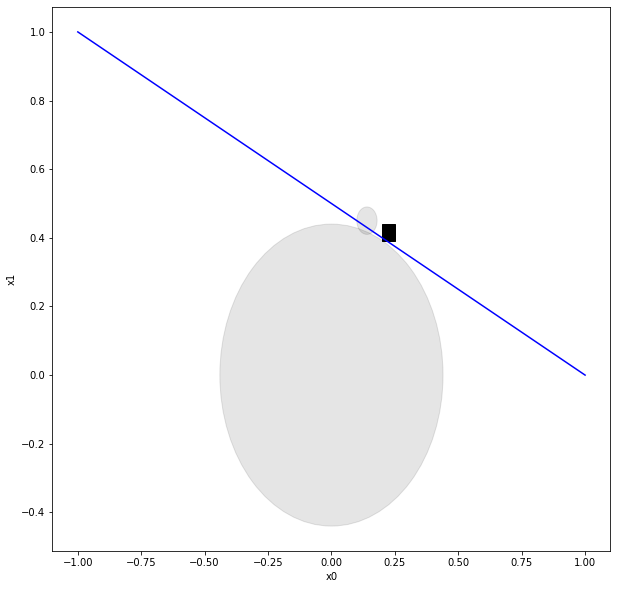

In [80]:
from matplotlib import pyplot as plt
from matplotlib.patches import Circle,Rectangle


x = np.linspace(-1,1,100)
y = 0.5 - 0.5*x

fig, ax = plt.subplots(figsize =(10, 10)) 

circle = Circle((0,0),0.44,alpha = 0.1,color = 'black')
square = Rectangle((0.2,0.39),0.05,0.05,color = 'black')
circle2 = Circle((0.14,0.45),0.04,alpha = 0.1,color = 'black')

ax.add_patch(square)
ax.add_patch(circle)
ax.add_patch(circle2)

x2 = x[x<2]
plt.xlabel('x0')
plt.ylabel('x1')
plt.plot(x,y,'b')


So, to find a minimal solution, we inflate the ball until it finds a sparse solution. But, there are solutions that are very close to our optimal point

In [41]:
#Lagrange Multipliers

import sympy as S
S.var('x1,x0,l',real = True)
J = S.Matrix([x0,x1]).norm()**2 +l*(1-x0-2*x1)
sol = S.solve(map(J.diff,[x0,x1,l]))
print(sol) 


{l: 2/5, x0: 1/5, x1: 2/5}


Now :
minimize  $\hspace{0.1cm} || x ||_{1} $ subject to $x_{0} + 2x_{1} = 1$ where $ || x||_{1} = \sum_{i=1}^d |x_{i}|$

In [42]:
from cvxpy import Variable, Problem , Minimize , norm1 , norm

x = Variable((2,1),name = 'x')
constr = [np.matrix([[1,2]])*x == 1 ]
obj=Minimize(norm1(x))
p = Problem(obj,constr)
p.solve()


0.49999999996804073

In [43]:
print(x.value)

[[6.2034426e-10]
 [5.0000000e-01]]


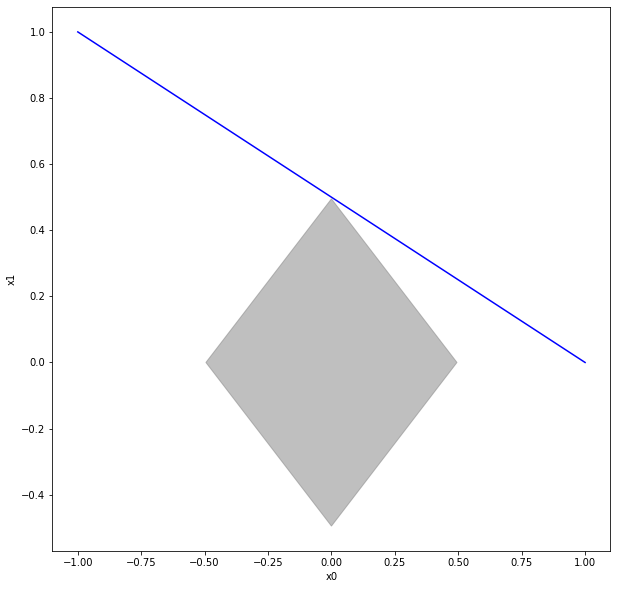

In [65]:
from matplotlib import pyplot as plt
from matplotlib.patches import Circle,Rectangle
import matplotlib as mlp

x = np.linspace(-1,1,100)
y = 0.5 - 0.5*x

fig, ax = plt.subplots(figsize =(10, 10)) 
r2 = Rectangle((-0.35,-0.35), 0.7, 0.7, color="gray",  alpha=0.50)
t2 = mlp.transforms.Affine2D().rotate_deg(-45) + ax.transData
r2.set_transform(t2)
ax.add_patch(r2)


plt.xlabel('x0')
plt.ylabel('x1')
plt.plot(x,y,'b')

Different from the $L_{2}$ norm, in this case we have only one optimal point.

In [82]:
#lets double check the L2 norm
from cvxpy import Variable, Problem , Minimize , norm1 , norm

x = Variable((2,1),name = 'x')
constr = [np.matrix([[1,2]])*x == 1 ]
obj=Minimize(norm(x,2))
p = Problem(obj,constr)
p.solve()

0.447213595357866

In [83]:
print(x.value) # same as before

[[0.2]
 [0.4]]


In [84]:
#higher dimensions 
x = Variable((4,1),name = 'x')
constr = [np.matrix([[1,2,3,4]])*x == 1 ]
obj=Minimize(norm1(x))
p = Problem(obj,constr)
p.solve()



0.2499999991355072

In [85]:
print(x.value) # same as before

[[3.88487210e-10]
 [8.33295420e-10]
 [7.97158511e-10]
 [2.49999999e-01]]


In [86]:
#higher dimensions 
x = Variable((4,1),name = 'x')
constr = [np.matrix([[1,2,3,4]])*x == 1 ]
obj=Minimize(norm(x,2))
p = Problem(obj,constr)
p.solve()



0.18257418572129216

In [87]:
print(x.value)

[[0.03333333]
 [0.06666667]
 [0.1       ]
 [0.13333333]]


# **THE NORM $L_{1}$ GIVES A SOLUTION MORE SPARSE THAN $L_{2}$,which is the main beneﬁt of using the $L_{1}$ norm**

$$ min_{\beta \in \mathbb{R}^p } || y - X \beta ||$$
$$ X = [x_{1},x_{2},...,x_{p}] \hspace{0.5cm} , X_{i} \in \mathbb{R}^n ,rank(X)= p$$
se $p=n$ , there is a unique solution , if $p < n$ , then there are infinitely many solutions

In [89]:
import sympy as S
from sympy import Matrix

X = Matrix([[1,2,3],
            [3,4,5]])
y = Matrix([[1,2]]).T
b0,b1,b2 = S.symbols('b:3',real = True)
beta = Matrix([[b0,b1,b2]]).T
obj = (y -X*beta).norm(ord=2)**2

sol = S.solve([obj.diff(i) for i in beta])
beta.subs(sol)

Matrix([
[         b2],
[-2*b2 + 1/2],
[         b2]])

Notice that the solution does not uniquely specify all the components of the beta variable. This is a consequence of the $p < n$ nature of this problem where $p = 2$ and $n =3$. While the existence of this ambiguity does not alter the solution.

In [90]:
obj.subs(sol)

0

In [91]:
beta.subs(sol).norm(2)

sqrt(2*b2**2 + (2*b2 - 1/2)**2)

In [97]:
S.solve((beta.subs(sol).norm()**2).diff())
betaL2=beta.subs(sol).subs(b2,S.Rational(1,6))
betaL2

Matrix([
[1/6],
[1/6],
[1/6]])

In [101]:
obj.subs(beta,betaL2)

(b0 + 2*b1 + 3*b2 - 1)**2 + (3*b0 + 4*b1 + 5*b2 - 2)**2

But what is so special about solutions of minimum length? For machine learning, driving the objective function to zero is symptomatic of over ﬁtting the data.Usually, at the zero bound,the machine learning method has essentially memorized the training data, which is bad for generalization.

$$ minimize_{\beta} \hspace{0.5cm} ||y - X\beta||_{2}^2$$
subject to 
$$||\beta||_{2} < c , \hspace{0.1cm} $$where c is the tuning parameter

# **Ridge Regression**

$$ min_{\beta \in \mathbb{R}^p } || y - X \beta || + \alpha ||\beta||_{2}^2$$



In [103]:
from sklearn.linear_model import Ridge
clf = Ridge(alpha=100.0,fit_intercept = False)
clf.fit(np.array(X).astype(float),np.array(y).astype(float))

Ridge(alpha=100.0, copy_X=True, fit_intercept=False, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)